In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import matplotlib.pyplot as plt
from src.config import get_dataset_and_user
%matplotlib inline

In [2]:
# get data
X_iris, user_iris = get_dataset_and_user('iris')
y_iris = user_iris.get_label(X_iris, update_counter=False)

X_housing, user_housing = get_dataset_and_user('housing')
y_housing = user_housing.get_label(X_housing, update_counter=False)

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import f1_score
clf = SVC(C=1000, kernel='rbf')
clf.fit(X_iris,y_iris)
f1_score(clf.predict(X_iris), y_iris)

1.0

(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)
(645, 24)


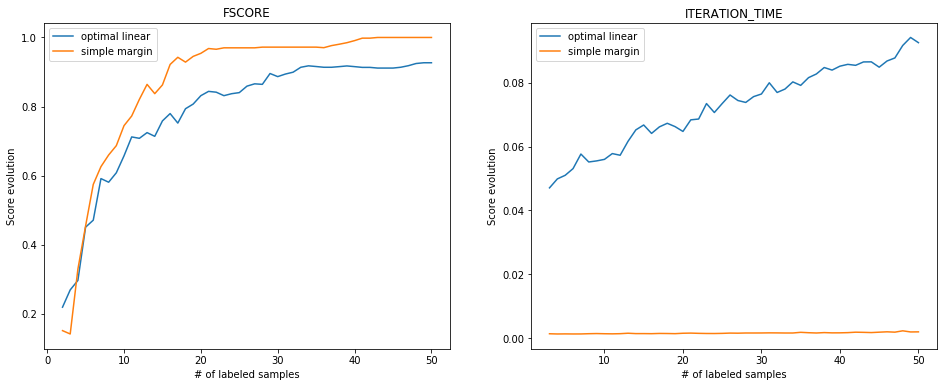

In [4]:
from src.active_learning.svm import SimpleMargin, SolverMethod, OptimalMargin
from src.active_learning.linear import LinearMajorityVote
from src.active_learning.agnostic import RandomLearner
from src.initial_sampling import FixedSizeStratifiedSampler
from src.showdown import Showdown
from src.plotting import plot_showdown

user_housing.max_iter = 50
user_iris.max_iter = 10

active_learners_list = [
    #("random", RandomLearner(SVC(C=100, kernel='rbf'))),
    ("optimal linear", OptimalMargin(C=100, kind='kernel', kernel='rbf', chain_length=50, sample_size=8, threshold=0.9, factorization_type='diagonalize')),
    ("simple margin", SimpleMargin(kind='kernel', kernel='rbf', C=100)),
    #('cholesky CL=50', OptimalMargin(C=100, kind='kernel', kernel='rbf', chain_length=50, factorization_type='cholesky')),
    #('diag th=0.9 CL=50', OptimalMargin(C=100, kind='kernel', kernel='rbf', chain_length=50, threshold=0.9, factorization_type='diagonalize')),
    #('diag th=0.9 CL=50 SS=8', OptimalMargin(C=100, kind='kernel', kernel='rbf', chain_length=50, sample_size=8, threshold=0.9, factorization_type='diagonalize')),
    #('diag th=0.9 CL=50, SS=16', OptimalMargin(C=100, kind='kernel', kernel='rbf', chain_length=50, sample_size=16, threshold=0.9, factorization_type='diagonalize')),
]

datasets_list = [
    ("housing", X_housing, user_housing),
    #("iris", X_iris, user_iris),
]

times = 20
initial_sampler = FixedSizeStratifiedSampler(sample_size=2)
showdown = Showdown(times, initial_sampler)
output = showdown.run(datasets_list, active_learners_list)

#print(output.head())
plot_showdown(output, times, metrics_list=['fscore', 'iteration_time'])

## Next steps
    - add logging
    - label points prematurely based on whether they cut the current version space or not (cut estimate = # samples)
    - add offset (add column of 1's ?) -> works on above cases. Should test on sdss also.
    - change classifier to average of sampled w's (similar to majority vote in ALuMa)
    - add sdss queries
    - initial sampling: use sampling to pick k points which closely cut the VS in 1/2^k proportion / probability of each region close to uniform (entropy criteria?). Can we avoid enumerating all k subsets?
    - start using majoirity vote until 1 pos and 1 neg point have been found?
    
    
    - dozens of labeled samples, low selectivity
    - Problems: categorical attibutes, few positive samples, noise 
    - try queries from sdss paper (user rbf kernel) -> see if these algorithms work better than simple margin 

In [5]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
K = rbf_kernel(X_housing.values)
lamb, P = np.linalg.eigh(K + 1e-8 * np.eye(len(X_housing)))
L = P.dot(np.sqrt(np.diag(lamb)))

In [6]:
output['housing']['fscore'].swaplevel(0,1, axis=1).sort_index(level=0, axis=1)

max                         mean                          min  \
   optimal linear simple margin optimal linear simple margin optimal linear   
2        0.800000      0.511628       0.219133      0.151262       0.025641   
3        0.833333      0.666667       0.269188      0.141585       0.080000   
4        0.833333      0.833333       0.296619      0.329372       0.046512   
5        0.833333      0.880000       0.450804      0.454067       0.086957   
6        0.833333      0.869565       0.471064      0.574580       0.105263   
7        0.833333      0.916667       0.591428      0.626052       0.117647   
8        0.833333      0.916667       0.580932      0.659732       0.117647   
9        0.833333      0.923077       0.608250      0.686780       0.133333   
10       0.833333      0.916667       0.657250      0.744643       0.133333   
11       0.880000      0.923077       0.712074      0.772649       0.142857   
12       0.916667      0.962963       0.708021      0.820825       0.142857   
13       0.916667      0.962963       0.724510      0.864168       0.142857   
14       0.916667      0.962963       0.713800      0.837318       0.142857   
15       0.916667      0.960000       0.758447      0.862547       0.142857   
16       0.916667      0.962963       0.779647      0.921905       0.142857   
17       0.923077      1.000000       0.752151      0.942604       0.142857   
18       0.923077      1.000000       0.793690      0.928621       0.142857   
19       0.923077      1.000000       0.807211      0.945221       0.142857   
20       0.960000      1.000000       0.831538      0.954095       0.142857   
21       0.960000      1.000000       0.843922      0.968000       0.142857   
22       0.960000      1.000000       0.841566      0.965833       0.142857   
23       0.960000      1.000000       0.831496      0.970000       0.142857   
24       0.960000      1.000000       0.837179      0.970000       0.142857   
25       0.960000      1.000000       0.840337      0.970000       0.142857   
26       0.960000      1.000000       0.859093      0.970000       0.200000   
27       0.960000      1.000000       0.865782      0.970000       0.250000   
28       0.960000      1.000000       0.864260      0.972000       0.266667   
29       0.960000      1.000000       0.895637      0.972000       0.631579   
30       0.960000      1.000000       0.886661      0.972000       0.631579   
31       0.960000      1.000000       0.894097      0.972000       0.631579   
32       1.000000      1.000000       0.899457      0.972000       0.631579   
33       1.000000      1.000000       0.913712      0.972000       0.869565   
34       1.000000      1.000000       0.917878      0.972000       0.869565   
35       1.000000      1.000000       0.915878      0.972000       0.869565   
36       1.000000      1.000000       0.913712      0.970429       0.869565   
37       1.000000      1.000000       0.913712      0.976429       0.869565   
38       1.000000      1.000000       0.915558      0.980429       0.869565   
39       1.000000      1.000000       0.917558      0.984857       0.869565   
40       1.000000      1.000000       0.915558      0.990857       0.869565   
41       1.000000      1.000000       0.913391      0.998000       0.869565   
42       1.000000      1.000000       0.913391      0.998000       0.869565   
43       0.960000      1.000000       0.911391      1.000000       0.869565   
44       0.960000      1.000000       0.911391      1.000000       0.869565   
45       0.960000      1.000000       0.911391      1.000000       0.869565   
46       0.960000      1.000000       0.913746      1.000000       0.869565   
47       0.960000      1.000000       0.918268      1.000000       0.869565   
48       1.000000      1.000000       0.924601      1.000000       0.869565   
49       1.000000      1.000000       0.926768      1.000000       0.869565   
50       1.000000      1.000000       0.926768      1.000000    